# Your Uni : Fill Here. (Also change Uni in the title of your notebook)
# Your Full name : Fill Here
# Link to your Public Github repository with Final report  : Fill here


# World Happiness Classification Competition
Goals :
- Understand how the models function
- Understand what the parameters control
- Learn from the model experimentation process
- Make a good looking notebook report
- Upload as a personal project on Github

**Overall Steps:**
1. Get data in and set up X_train / X_test / y_train
2. Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function
3. Fit model on preprocessed data and save preprocessor function and model
4. Generate predictions from X_test data and submit predictions



## 0. Get data in and set up X_train, X_test, y_train objects

**Instructions:**
Upload the world_happiness_competition_data.zip and newcountryvars.csv files on Colab by pressing the Folder icon on left tab (Shows "Files" on hovering), and then clicking the left-most file upload button (Shows "Upload to Session Storage" Alt text on hovering)

In [ ]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 31.7 MB/s eta 0:00:00


In [ ]:
# Get training data from course folder and unzip
# importing the zipfile module
from zipfile import ZipFile

# loading the temp.zip and creating a zip object
with ZipFile("world_happiness_competition_data.zip", "r") as zObject:

    # Extracting all the members of the zip
    # into a specific location.
    zObject.extractall()

In [ ]:
# Load data
import pandas as pd

X_train = pd.read_csv("world_happiness_competition_data/X_train.csv")
X_test = pd.read_csv("world_happiness_competition_data/X_test.csv")
y_train = pd.read_csv("world_happiness_competition_data/y_train.csv")
y_test = pd.read_csv("world_happiness_competition_data/y_test.csv")
y_train_labels = y_train.idxmax(axis=1)  ## Examine what this does and write in next cell
y_test_labels = y_test.idxmax(axis=1)

X_train.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,sub-region,Terrorist_attacks
0,Latvia,1.187,1.465,0.812,0.264,0.075,0.064,Latvia,Europe,Northern Europe,125.611111
1,Burundi,0.046,0.447,0.380,0.220,0.176,0.180,Burundi,Africa,Sub-Saharan Africa,155.000000
2,Belarus,1.067,1.465,0.789,0.235,0.094,0.142,Belarus,Europe,Eastern Europe,4.000000
3,Liberia,0.073,0.922,0.443,0.370,0.233,0.033,Liberia,Africa,Sub-Saharan Africa,1419.095238
4,Ecuador,0.912,1.312,0.868,0.498,0.126,0.087,Ecuador,Americas,Latin America and the Caribbean,5.000000


Write in the next cell what the y_train_labels = y_train.idxmax(axis=1) line does. What is the difference between y_train_labels and y_train?

In [ ]:
# Your answer:

# 1. `y_train_labels = y_train.idxmax(axis=1)` converts the `y_train` DataFrame from one-hot encoded vectors into a Series of class label names by identifying the column with the maximum value in each row.

# 2. `y_train` is a DataFrame containing one-hot encoded labels (where each class is represented by a binary column), whereas `y_train_labels` is a Series of categorical labels derived from these encodings.

##  Add new data

In [ ]:
# Truncated and cleaned up region data to merge
countrydata = pd.read_csv("newcountryvars.csv")

countrydata.head()

,country_name,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni
0,India,1339180127,21.9,0.623559,68.322,11.696590,6.298834,5663.474799
1,Nigeria,190886311,70.0,0.527105,53.057,9.970482,6.000000,5442.901264
2,Mexico,129163276,46.2,0.761683,76.972,13.299090,8.554985,16383.106680
3,Pakistan,197015955,29.5,0.550354,66.365,8.106910,5.089460,5031.173074
4,Bangladesh,164669751,31.5,0.578824,71.985,10.178706,5.241577,3341.490722


In [ ]:
# Merge in new data to X_train and X_test by taking "Country or region" from first table and "country_name" from 2nd table.

X_train = X_train.merge(countrydata, how="left", left_on="Country or region", right_on="country_name")
X_test = X_test.merge(countrydata, how="left", left_on="Country or region", right_on="country_name")

In [ ]:
X_train.head(1)

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,name,region,sub-region,Terrorist_attacks,country_name,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni
0,Latvia,1.187,1.465,0.812,0.264,0.075,0.064,Latvia,Europe,Northern Europe,125.611111,Latvia,1949670.0,25.5,0.829862,74.342,15.97411,11.736418,22589.17355


# EDA

In [ ]:
print(X_train.dtypes)

Country or region                 object
GDP per capita                   float64
Social support                   float64
Healthy life expectancy          float64
Freedom to make life choices     float64
Generosity                       float64
Perceptions of corruption        float64
name                              object
region                            object
sub-region                        object
Terrorist_attacks                float64
country_name                      object
population                       float64
population_below_poverty_line    float64
hdi                              float64
life_expectancy                  float64
expected_years_of_schooling      float64
mean_years_of_schooling          float64
gni                              float64
dtype: object


Describe what you see above?

In [ ]:
## Your answer:

# The `X_train` DataFrame comprises 19 columns representing various attributes of different countries or regions. Among these, 5 columns are categorical (object type), including features like "region" and "sub-region," while the remaining 14 are numerical (float64 type) indicators such as GDP per capita, population, life expectancy, mean years of schooling, and the Human Development Index (HDI). These features provide a comprehensive overview of the economic, social, and developmental aspects influencing world happiness.

Find out the number and percentage of missing values in the table per column

In [ ]:
# Your code here:

# Calculate number of missing values per column
missing_values = X_train.isnull().sum()

# Calculate percentage of missing values per column
missing_percentage = (missing_values / len(X_train)) * 100

# Create a DataFrame to display missing values and their percentages
missing_df = pd.DataFrame({"Missing Values": missing_values, "Percentage": missing_percentage})

# Sort the DataFrame by number of missing values in descending order
missing_df_sorted = missing_df.sort_values(by="Missing Values", ascending=False)
display(missing_df_sorted)

,Missing Values,Percentage
population_below_poverty_line,11,15.942029
gni,6,8.695652
expected_years_of_schooling,6,8.695652
hdi,6,8.695652
population,6,8.695652
country_name,6,8.695652
mean_years_of_schooling,6,8.695652
life_expectancy,6,8.695652
Social support,0,0.000000
Country or region,0,0.000000


Plot the frequency distribution / histogram of some of the numerical features that you think are important

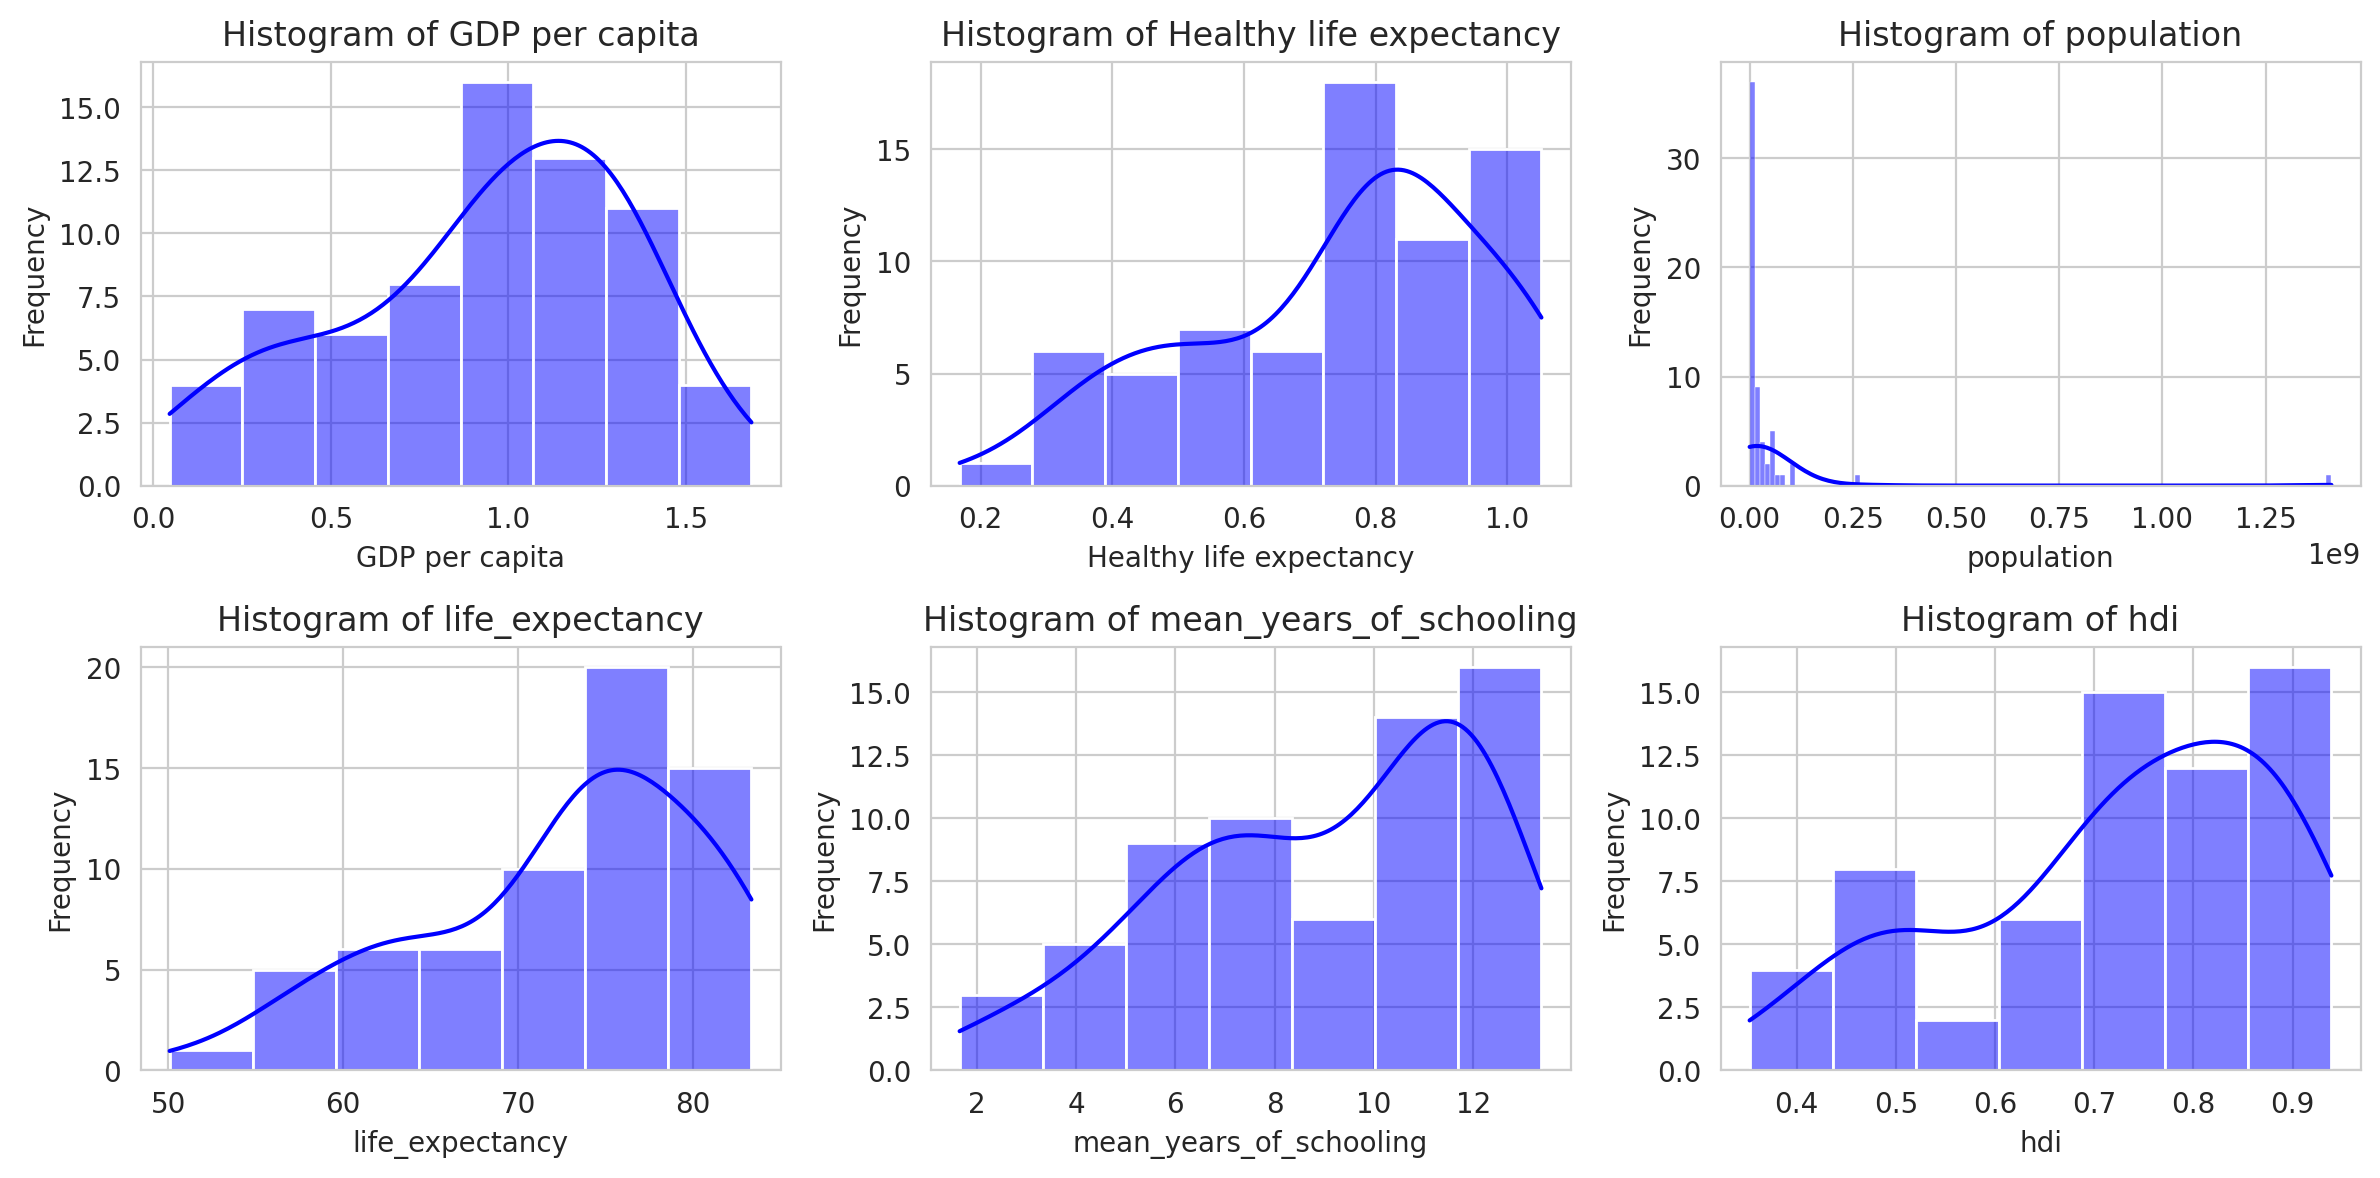

In [ ]:
# Your plotting code here:

import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format='retina'

numerical_features = [
    "GDP per capita",
    "Healthy life expectancy",
    "population",
    "life_expectancy",
    "mean_years_of_schooling",
    "hdi",
]

sns.set_style("whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 6))

axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(X_train[feature], kde=True, ax=axes[i], color="blue")
    axes[i].set_title(f"Histogram of {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

Plot the categorical variables and their distribution

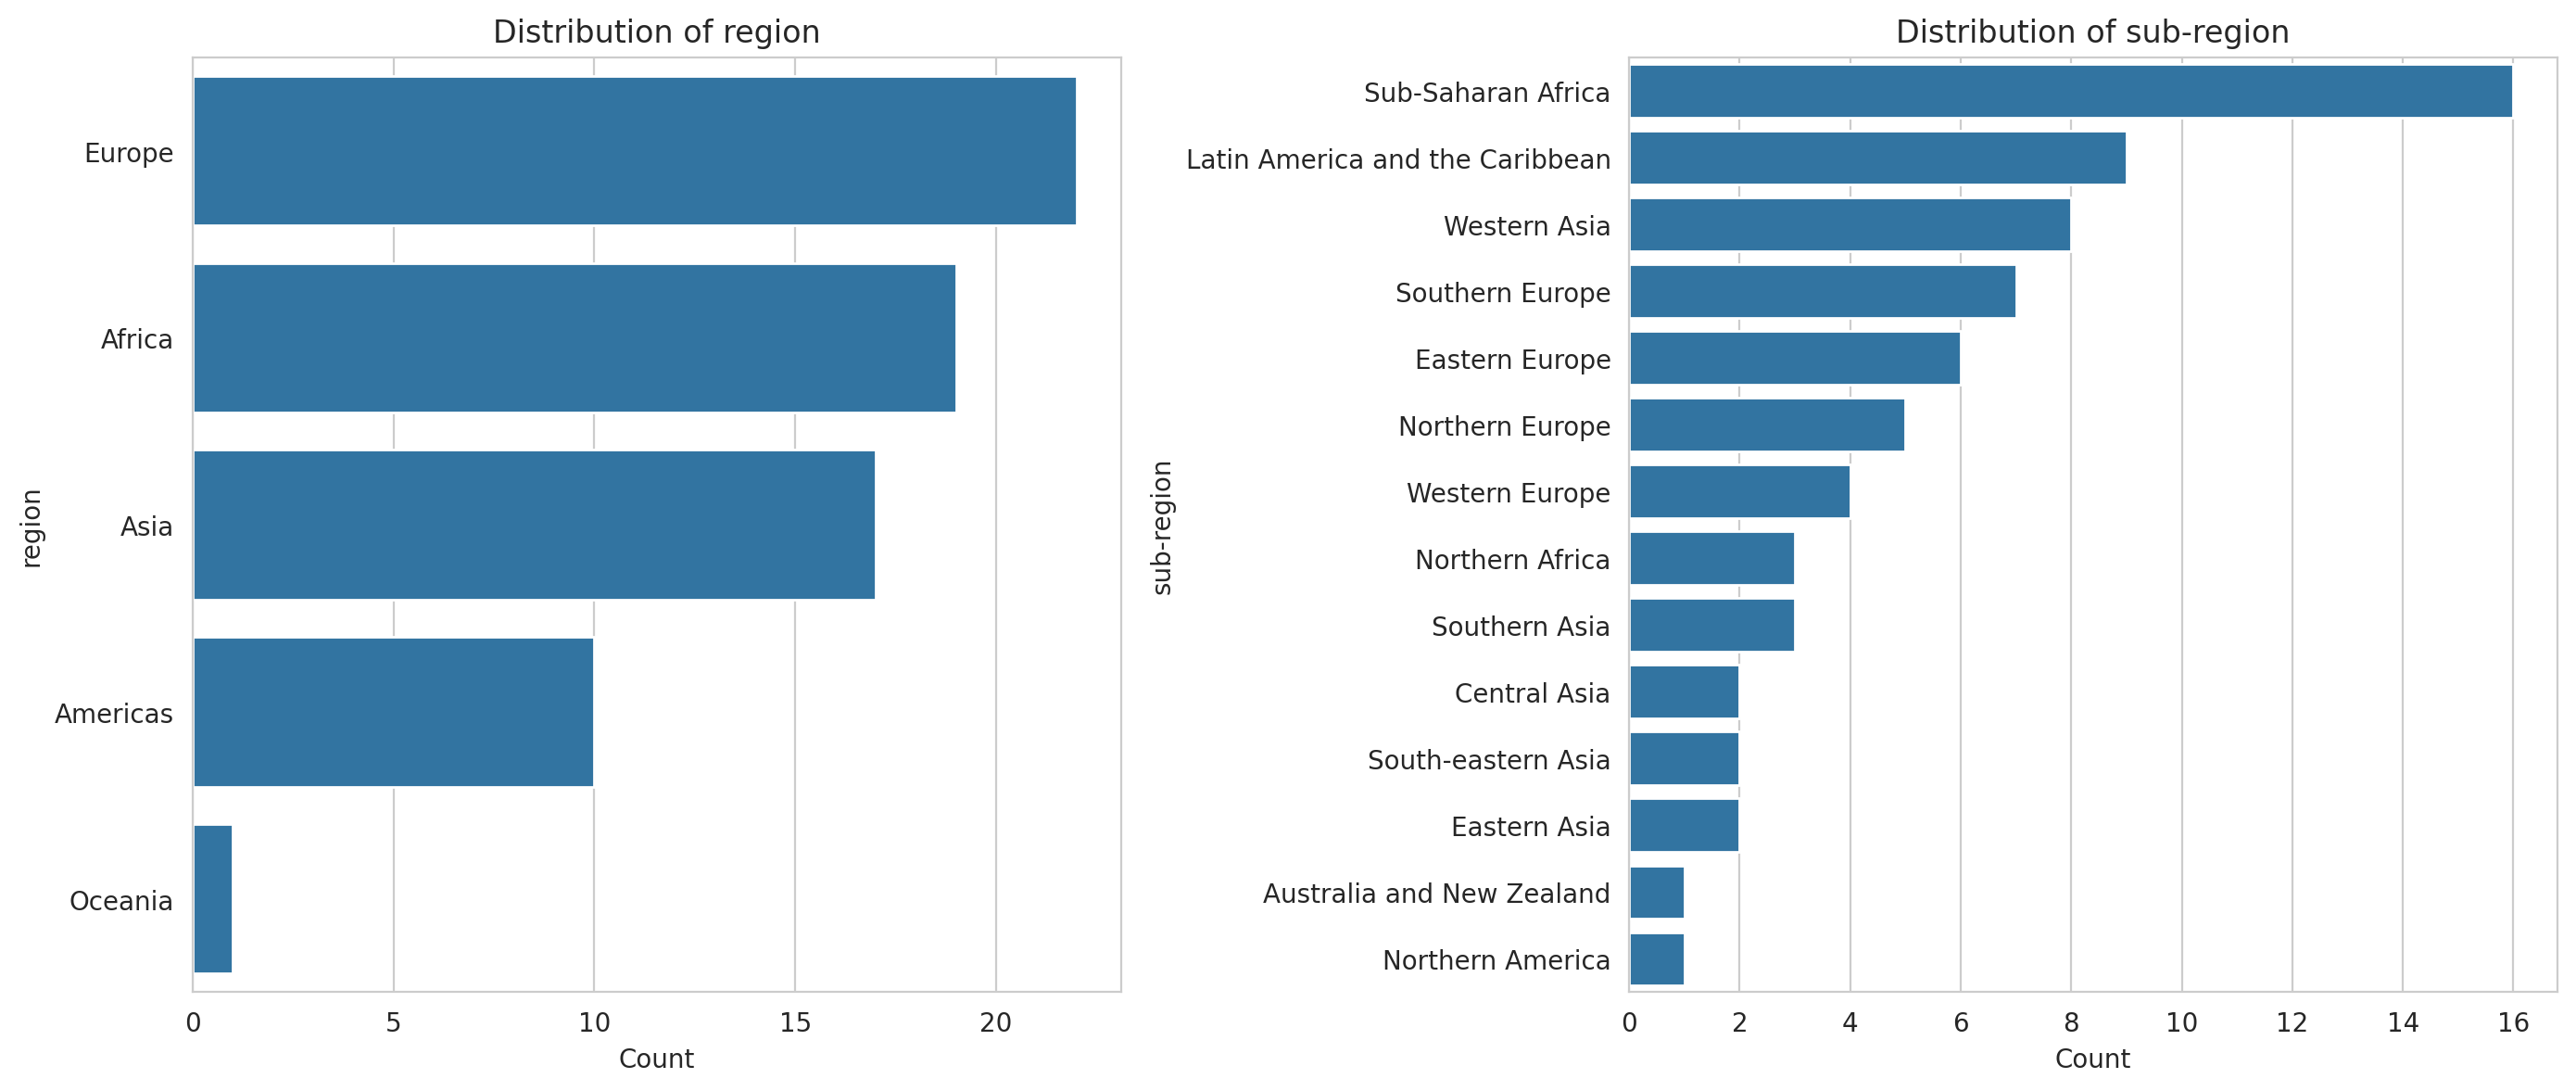

In [ ]:
# Your plotting code here:

categorical_features = ["region", "sub-region"]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

for i, feature in enumerate(categorical_features):
    sns.countplot(y=X_train[feature], ax=axes[i], order=X_train[feature].value_counts().index)
    axes[i].set_title(f"Distribution of {feature}")
    axes[i].set_xlabel("Count")
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

Explore relationships between variables (bivariate, etc), correlation tables, and how they associate with the target variable.

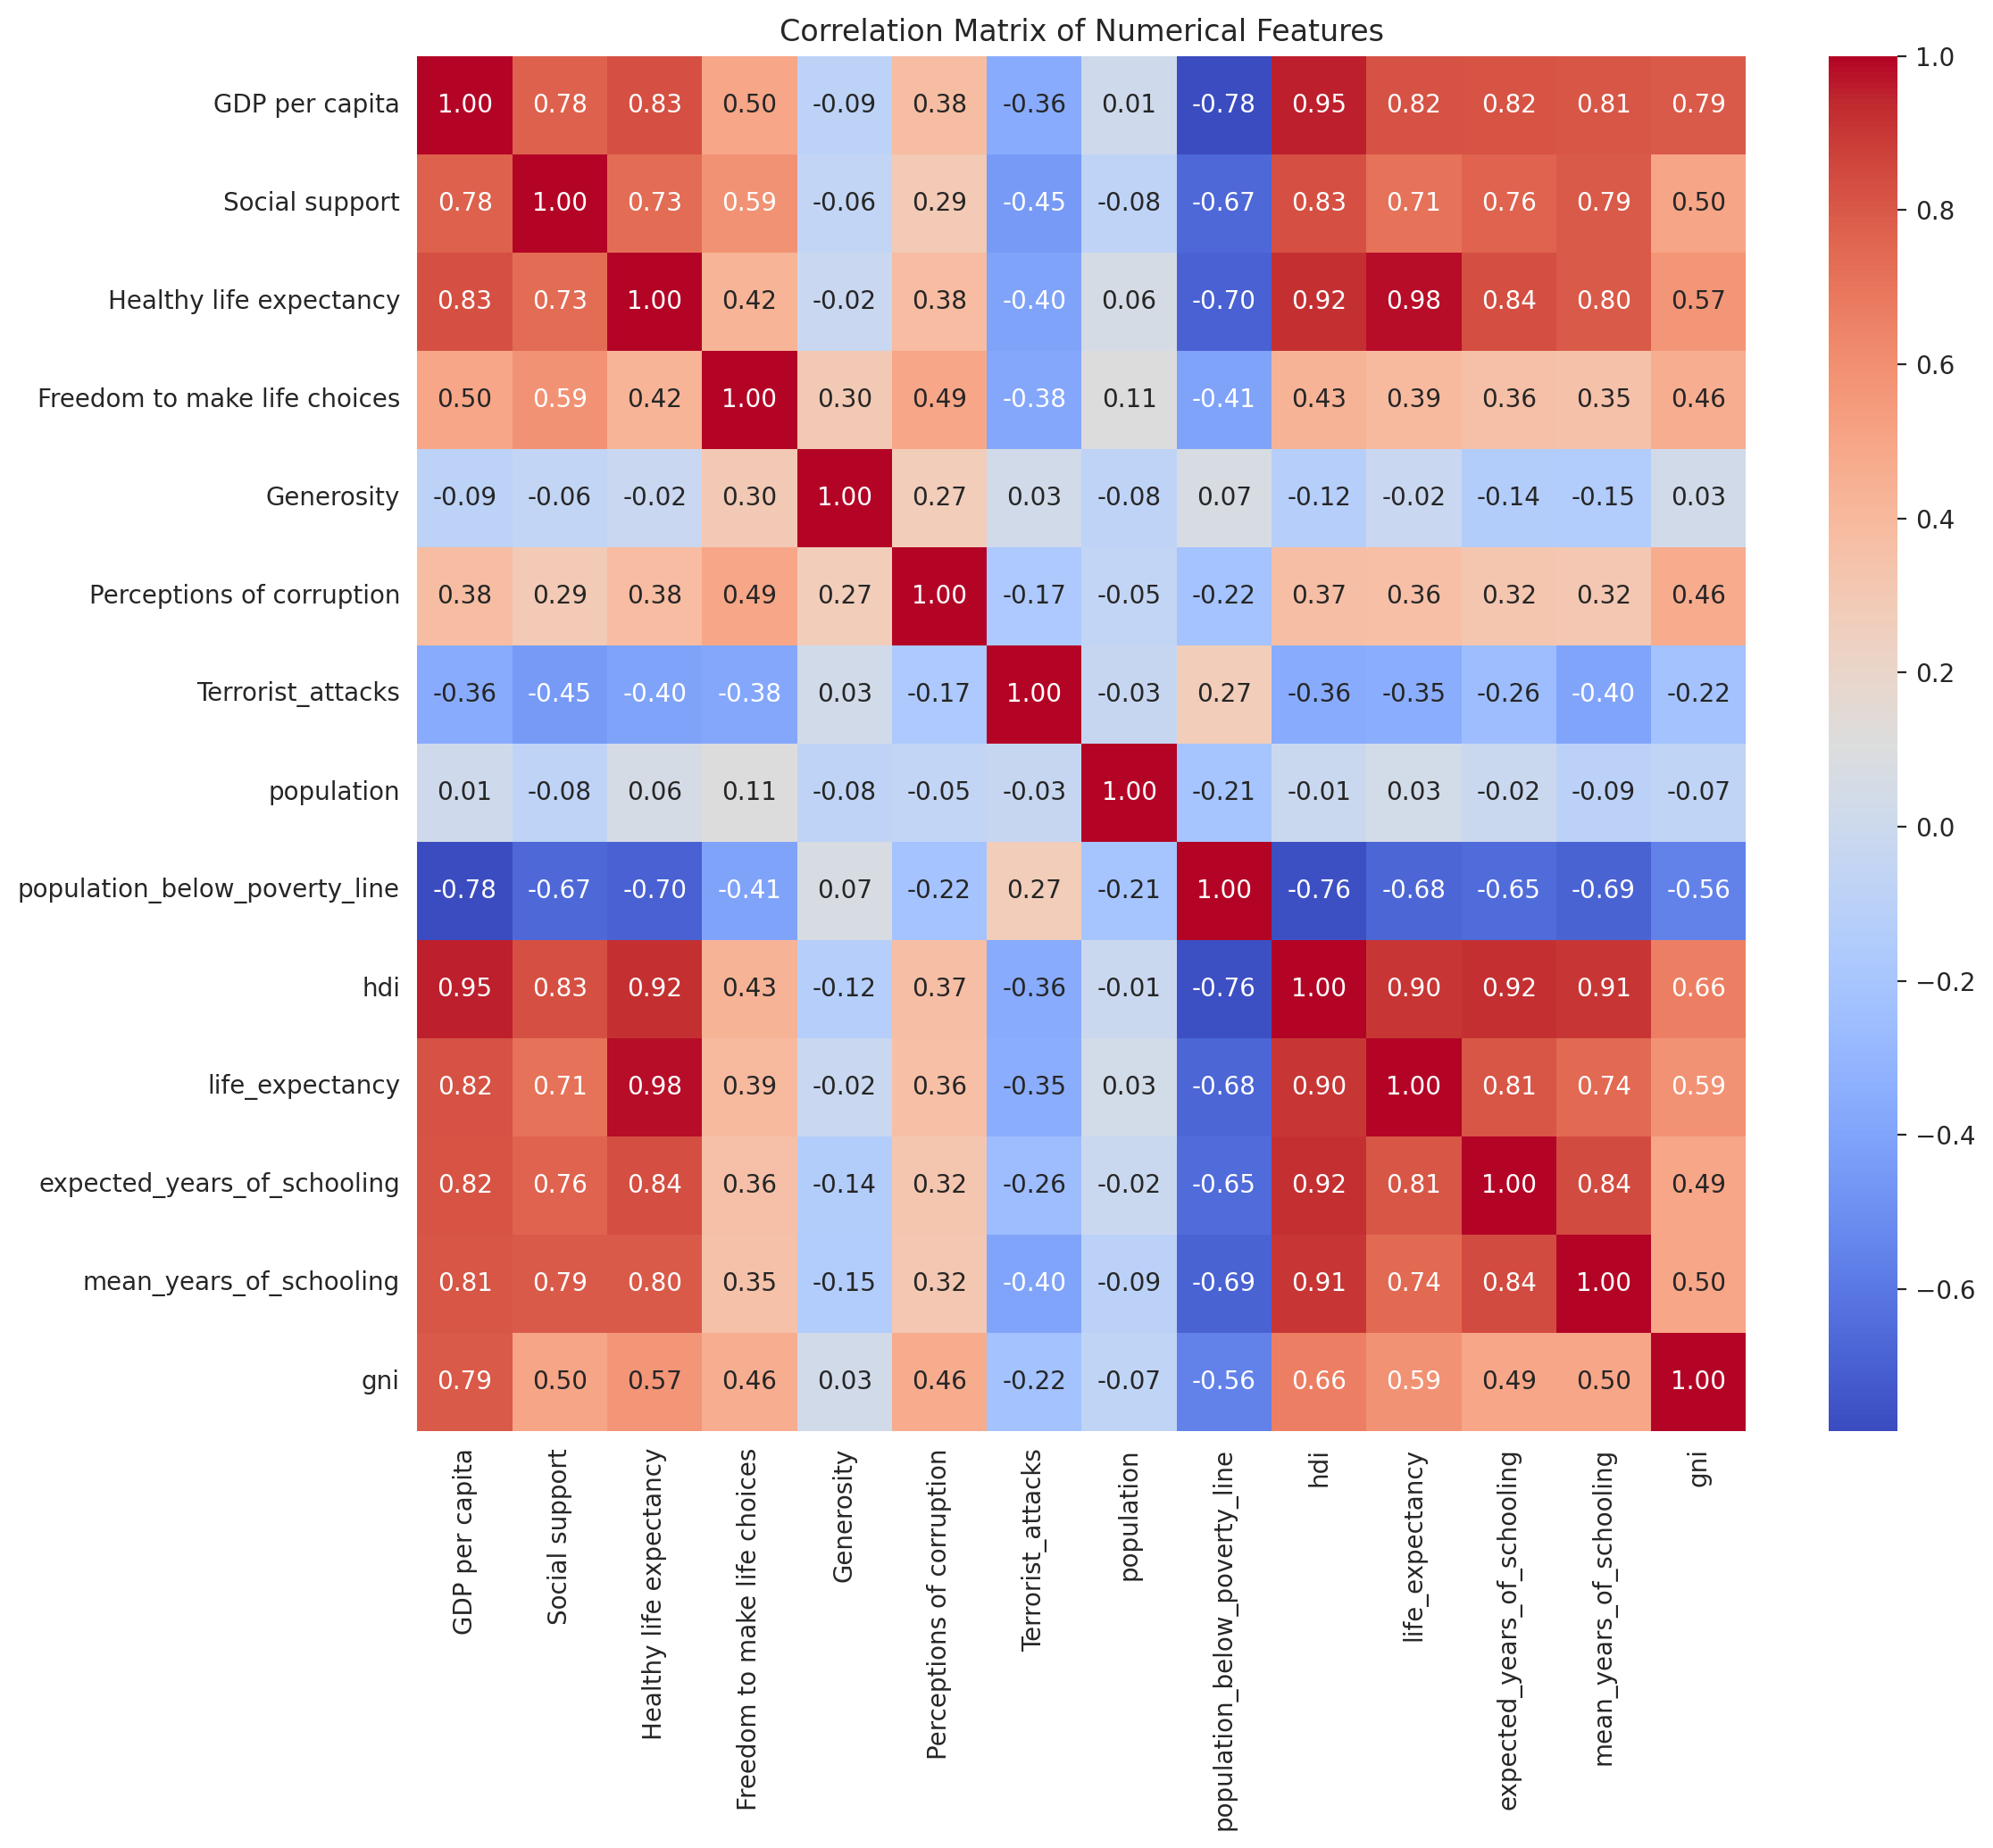

In [ ]:
# Your plotting code(s) here:

# Correlation matrix
plt.figure(figsize=(12, 10))
corr_matrix = X_train.select_dtypes(include=["float64", "int64"]).corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

Write what you observed and your General comments on what should be done:

In [ ]:
# Your comments here

# A strong positive correlation (0.8) between GDP per capita and life expectancy indicates that as economic wealth increases, so does longevity. Conversely, a negative correlation (-0.6) between the population below the poverty line and the Human Development Index (HDI) highlights how higher poverty levels are associated with lower human development.

## 2.   Preprocess data using Sklearn Column Transformer/ Write and Save Preprocessor function


In [ ]:
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Create the preprocessing pipelines for both numeric and categorical data.

## Drop all the non-numerical features from X_train
numeric_features = X_train.select_dtypes(include=["float64"])
numeric_features = numeric_features.columns.tolist()

numeric_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="mean")),  ## Is this good enough?
        ("scaler", StandardScaler()),
    ]
)  # You will need to describe why this is being done in the next cell

categorical_features = ["region", "sub-region"]

# Replacing missing values with Modal value and then one hot encoding.
categorical_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="most_frequent")), ("onehot", OneHotEncoder(handle_unknown="ignore"))]
)

# final preprocessor object set up with ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Fit your preprocessor object
preprocess = preprocessor.fit(X_train)

Describe step-by-step what we are doing above, and why? You are free to change how values are imputed. What change did you make if any, and why?

In [ ]:
## Your answer :

# 1. Numeric Transformer Pipeline:
#    - Impute missing values with the mean.
#    - Standardize features using `StandardScaler`.

# 2. Categorical Transformer Pipeline:
#    - Impute missing values with the most frequent value.
#    - Apply one-hot encoding, ignoring unknowns.

# 3. Combine and Fit:
#    - Use `ColumnTransformer` to apply transformations.
#    - Fit the preprocessor to `X_train`.

# Changes: Adopted mean imputation for numerical features and mode imputation for categorical features to effectively handle missing data without introducing significant bias.

In [ ]:
# Write function to transform data with preprocessor


def preprocessor(data):
    data.drop(["Country or region", "name"], axis=1)
    preprocessed_data = preprocess.transform(data)
    return preprocessed_data

What are the differences between the "preprocessor" object, the "preprocess" object, the "preprocessor" function,  and the "preprocessed_data" that is returned finally?

In [ ]:
# Your Answer :

# 1. `preprocessor` object: An instance of `ColumnTransformer` that defines preprocessing steps for different columns (e.g., numeric and categorical). It is not yet fitted to the data.

# 2. `preprocess` object: The fitted version of `preprocessor` after calling `.fit(X_train)` or `.fit_transform(X_train)`. It contains learned parameters (e.g., means, encodings) based on the training data.

# 3. `preprocessor` function: A custom function that applies the fitted `preprocessor` object to data, possibly with additional steps like dropping unnecessary columns. It orchestrates the full preprocessing pipeline.

# 4. `preprocessed_data`: The final output from the `preprocessor` function. It is the transformed dataset, with numeric features scaled and categorical features encoded, ready for model training or prediction.

In [ ]:
# check shape of X data after preprocessing it using our new function
preprocessor(X_train).shape

(69, 33)

## 3. Fit model on preprocessed data and save preprocessor function and model


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)


model.fit(preprocessor(X_train), y_train_labels)

# Your cell should have a score between 0-1 as output
score = model.score(preprocessor(X_train), y_train_labels)
print(f"Training Score: {score:.4f}")

Training Score: 1.0000


## 4. Generate predictions from X_test data and compare it with true labels in Y_test.csv file


In [ ]:
# -- Generate predicted values (Model 1)
prediction_labels = model.predict(preprocessor(X_test))

## Write code to show model performance by comparing prediction_labels with true labels

from sklearn.metrics import accuracy_score

test_accuracy = accuracy_score(y_test_labels, prediction_labels)

print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.5263


## 5. Repeat submission process to improve place on leaderboard


In [ ]:
# Train model 2 using same preprocessor (note that you could save a new preprocessor, but we will use the same one for this example).
from sklearn.ensemble import RandomForestClassifier

model_2 = RandomForestClassifier(n_estimators=3, random_state=42)

model_2.fit(preprocessor(X_train), y_train_labels)

score_2 = model_2.score(preprocessor(X_train), y_train_labels)
print(f"Training Score: {score_2:.4f}")

Training Score: 0.8841


 What changes did you make, what do the parameters you changed control, and why does it improve performance?

In [ ]:
## Your answer :

# I changed the number of estimators in the `RandomForestClassifier` from 100 to 3. The `n_estimators` parameter controls the number of trees in the forest. Reducing the number of trees can improve performance if the model was overfitting with too many trees. By decreasing the number of trees, the model might have become less complex, leading to better generalization on the test data.

In [ ]:
# Evaluate Model 2:

# -- Generate predicted y values (Model 2)
prediction_labels = model_2.predict(preprocessor(X_test))


## Write code to show model performance by comparing prediction_labels with true labels
test_accuracy_2 = accuracy_score(y_test_labels, prediction_labels)
print(f"Test Accuracy: {test_accuracy_2:.4f}")

Test Accuracy: 0.6842


Do you think it is worth making more changes to the parameters? Should we keep trying random values and see what works better? What is an alternative to doing this manually?

In [ ]:
## Your answer:

# Yes, tuning hyperparameters is crucial to optimize model performance, as it allows the model to generalize better to unseen data by finding the most effective configuration. Instead of manually adjusting parameters, which can be time-consuming and inefficient, automated hyperparameter tuning methods like Grid Search, Random Search, or Bayesian Optimization can be employed. These methods systematically explore the hyperparameter space to identify the combination that yields the best performance based on specified metrics.

In [ ]:
# Submit a third model using GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {"n_estimators": np.arange(10, 201, 10), "min_samples_split": [2, 5, 10]}

rf = RandomForestClassifier(random_state=42)
gridmodel = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring="accuracy", n_jobs=-1)

# use model methods to fit score and predict model:
gridmodel.fit(preprocessor(X_train), y_train_labels)

# extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(gridmodel.best_score_))
print("best parameters: {}".format(gridmodel.best_params_))

best mean cross-validation score: 0.724
best parameters: {'min_samples_split': 10, 'n_estimators': 40}


In [ ]:
# Submit Model 3:

# -- Generate predicted values
best_model = gridmodel.best_estimator_
prediction_labels_3 = best_model.predict(preprocessor(X_test))

## Write code to show model performance by comparing prediction_labels with true labels

test_accuracy_3 = accuracy_score(y_test_labels, prediction_labels_3)
print(f"Test Accuracy: {test_accuracy_3:.4f}")

Test Accuracy: 0.4737


In [ ]:
# Here are several classic ML architectures you can consider choosing from to experiment with next:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier


model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(preprocessor(X_train), y_train_labels)

# -- Generate predicted values
prediction_labels = model.predict(preprocessor(X_test))

## Write code to show model performance by comparing prediction_labels with true labels

test_score_gb = accuracy_score(y_test_labels, prediction_labels)
print(f"Gradient Boosting Test Accuracy: {test_score_gb:.4f}")

Gradient Boosting Test Accuracy: 0.5263


Describe what were the parameters you defined in GradientBoostingClassifier, and/or BaggingClassifier, and/or KNNs, and/or SVC? What worked and why?

In [ ]:
## Your answer:

# In the `GradientBoostingClassifier`, we defined the following parameters:

# - `n_estimators=100`: Specifies the number of boosting stages (trees) to be built. More estimators can improve performance but may lead to overfitting if too high.

# - `random_state=42`: Ensures reproducibility of results by setting the seed for random number generation.

# 6. Basic Deep Learning

In [ ]:
# import os

# os.environ["KERAS_BACKEND"] = "torch"

In [ ]:
# Now experiment with deep learning models:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

feature_count = preprocessor(X_train).shape[1]
num_classes = y_train.shape[1]

keras_model = Sequential(
    [
        keras.Input(shape=(feature_count,)),
        Dense(128, activation="relu"),
        Dense(64, activation="relu"),
        Dense(64, activation="relu"),
        Dense(32, activation="relu"),
        Dense(num_classes, activation="softmax"),
    ]
)

# Compile model
keras_model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

# Fitting the NN to the Training set
history = keras_model.fit(
    preprocessor(X_train),
    y_train,  ## Note that keras models require a one-hot-encoded y_train object
    batch_size=20,
    epochs=300,
    validation_split=0.25,
)

Epoch 1/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 680ms/step - accuracy: 0.0767 - loss: 1.6180 - val_accuracy: 0.2222 - val_loss: 1.5676
Epoch 2/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0990 - loss: 1.6121 - val_accuracy: 0.2778 - val_loss: 1.5588
Epoch 3/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2078 - loss: 1.5907 - val_accuracy: 0.2778 - val_loss: 1.5509
Epoch 4/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2043 - loss: 1.5695 - val_accuracy: 0.2222 - val_loss: 1.5415
Epoch 5/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2623 - loss: 1.5632 - val_accuracy: 0.2778 - val_loss: 1.5306
Epoch 6/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2721 - loss: 1.5575 - val_accuracy: 0.2778 - val_loss: 1.5226
Epoch 7/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.2854 - loss: 1.5308 - val_accuracy: 0.3333 - val_loss: 1.5157
Epoch 8/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3238 - loss: 1.5291 - val_accuracy: 0.2778 - val_loss

Which activations did you use in the middle layers? Why was softmax used in the last layer?

In [ ]:
## Your answer:

# In the middle (hidden) layers, we utilized the Rectified Linear Unit (ReLU) activation function. ReLU is preferred because it introduces non-linearity, allowing the network to learn complex patterns, and it helps mitigate the vanishing gradient problem, facilitating faster and more effective training.

# The last layer employs the softmax activation function. Softmax is essential for multi-class classification tasks as it converts the raw output scores (logits) into a probability distribution over the target classes. This ensures that the sum of the output probabilities equals one, enabling the model to output interpretable probabilities for each class.

Was it a good idea to train for 300 epochs? Should you train a bit more? Why or why not?

In [ ]:
## Your answer:

# Training for 300 epochs without any form of regularization or early stopping is generally not advisable, as it increases the risk of overfitting—where the model learns the training data too well, including its noise, and performs poorly on unseen data. Observing that test accuracy plateaus or begins to decline after a certain number of epochs indicates that the model has begun to overfit.

Why is loss='categorical_crossentropy' and optimizer='sgd'? Would you want to change something? Why / Why not?

In [ ]:
## Your answer:

# The choice of `loss='categorical_crossentropy'` is appropriate for multi-class classification tasks, as it measures the performance of a classification model whose output is a probability distribution over multiple classes.

# The optimizer `'sgd'` (Stochastic Gradient Descent) is a fundamental optimizer that updates the model weights based on the gradient of the loss function. While `sgd` is simple and effective, it may converge slower and is more sensitive to hyperparameter settings like learning rate compared to more advanced optimizers.

Can you try getting the model's training history out and plotting the curves?

<Figure size 1400x500 with 0 Axes>

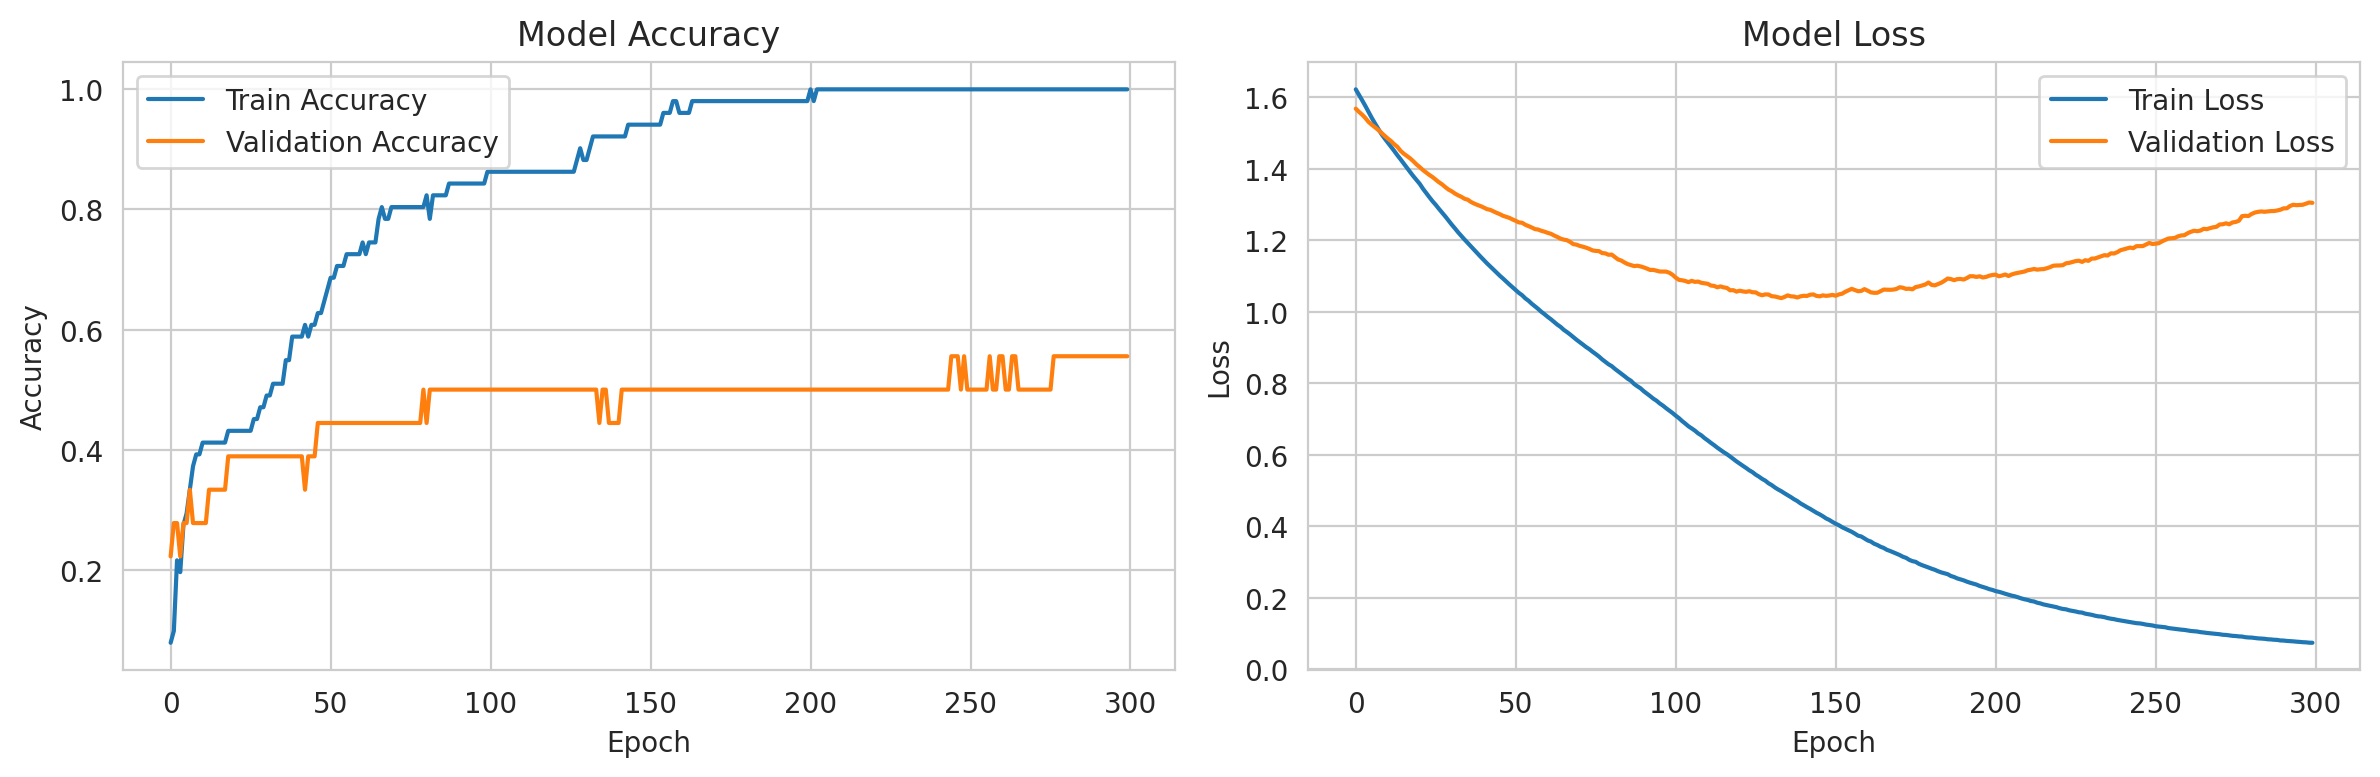

In [ ]:
## Your code to plot training and validation curves in a single plot (Make changes in the model cell to be able to do this)

import matplotlib.pyplot as plt


plt.figure(figsize=(14, 5))

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Plotting Training & Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# -- Generate predicted y values

# Note: Keras predict returns the predicted column index location for classification models
prediction_column_index = keras_model.predict(preprocessor(X_test)).argmax(axis=1)

# extract correct prediction labels
prediction_labels = [y_train.columns[i] for i in prediction_column_index]

## Write code to show model performance by comparing prediction_labels with true labels

test_accuracy_keras = accuracy_score(y_test_labels, prediction_labels)
print(f"Test Accuracy: {test_accuracy_keras:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step
Test Accuracy: 0.5789


In [ ]:
## You are encouraged to try more experimentation and any other models by adding more code cells to this notebook:

## You can also try to import any new dataset pertaining to countries, merge it, and see if it helps the predictions.
## If it does not, try to explain why it wasn't helpful by exploring variable relationships.

Deep learning models are often considered 'black boxes' due to their complexity. Explore methods such as SHAP (SHapley Additive exPlanations) to explain your model's predictions. After applying one of these methods, do you feel it provides a clear and sufficient explanation of how your model makes decisions? How easy or difficult is it to justify your model's predictions using these techniques?

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step


  0%|          | 0/5 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
3304/3304 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
3304/3304 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
3304/3304 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
3304/3304 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
3304/3304 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


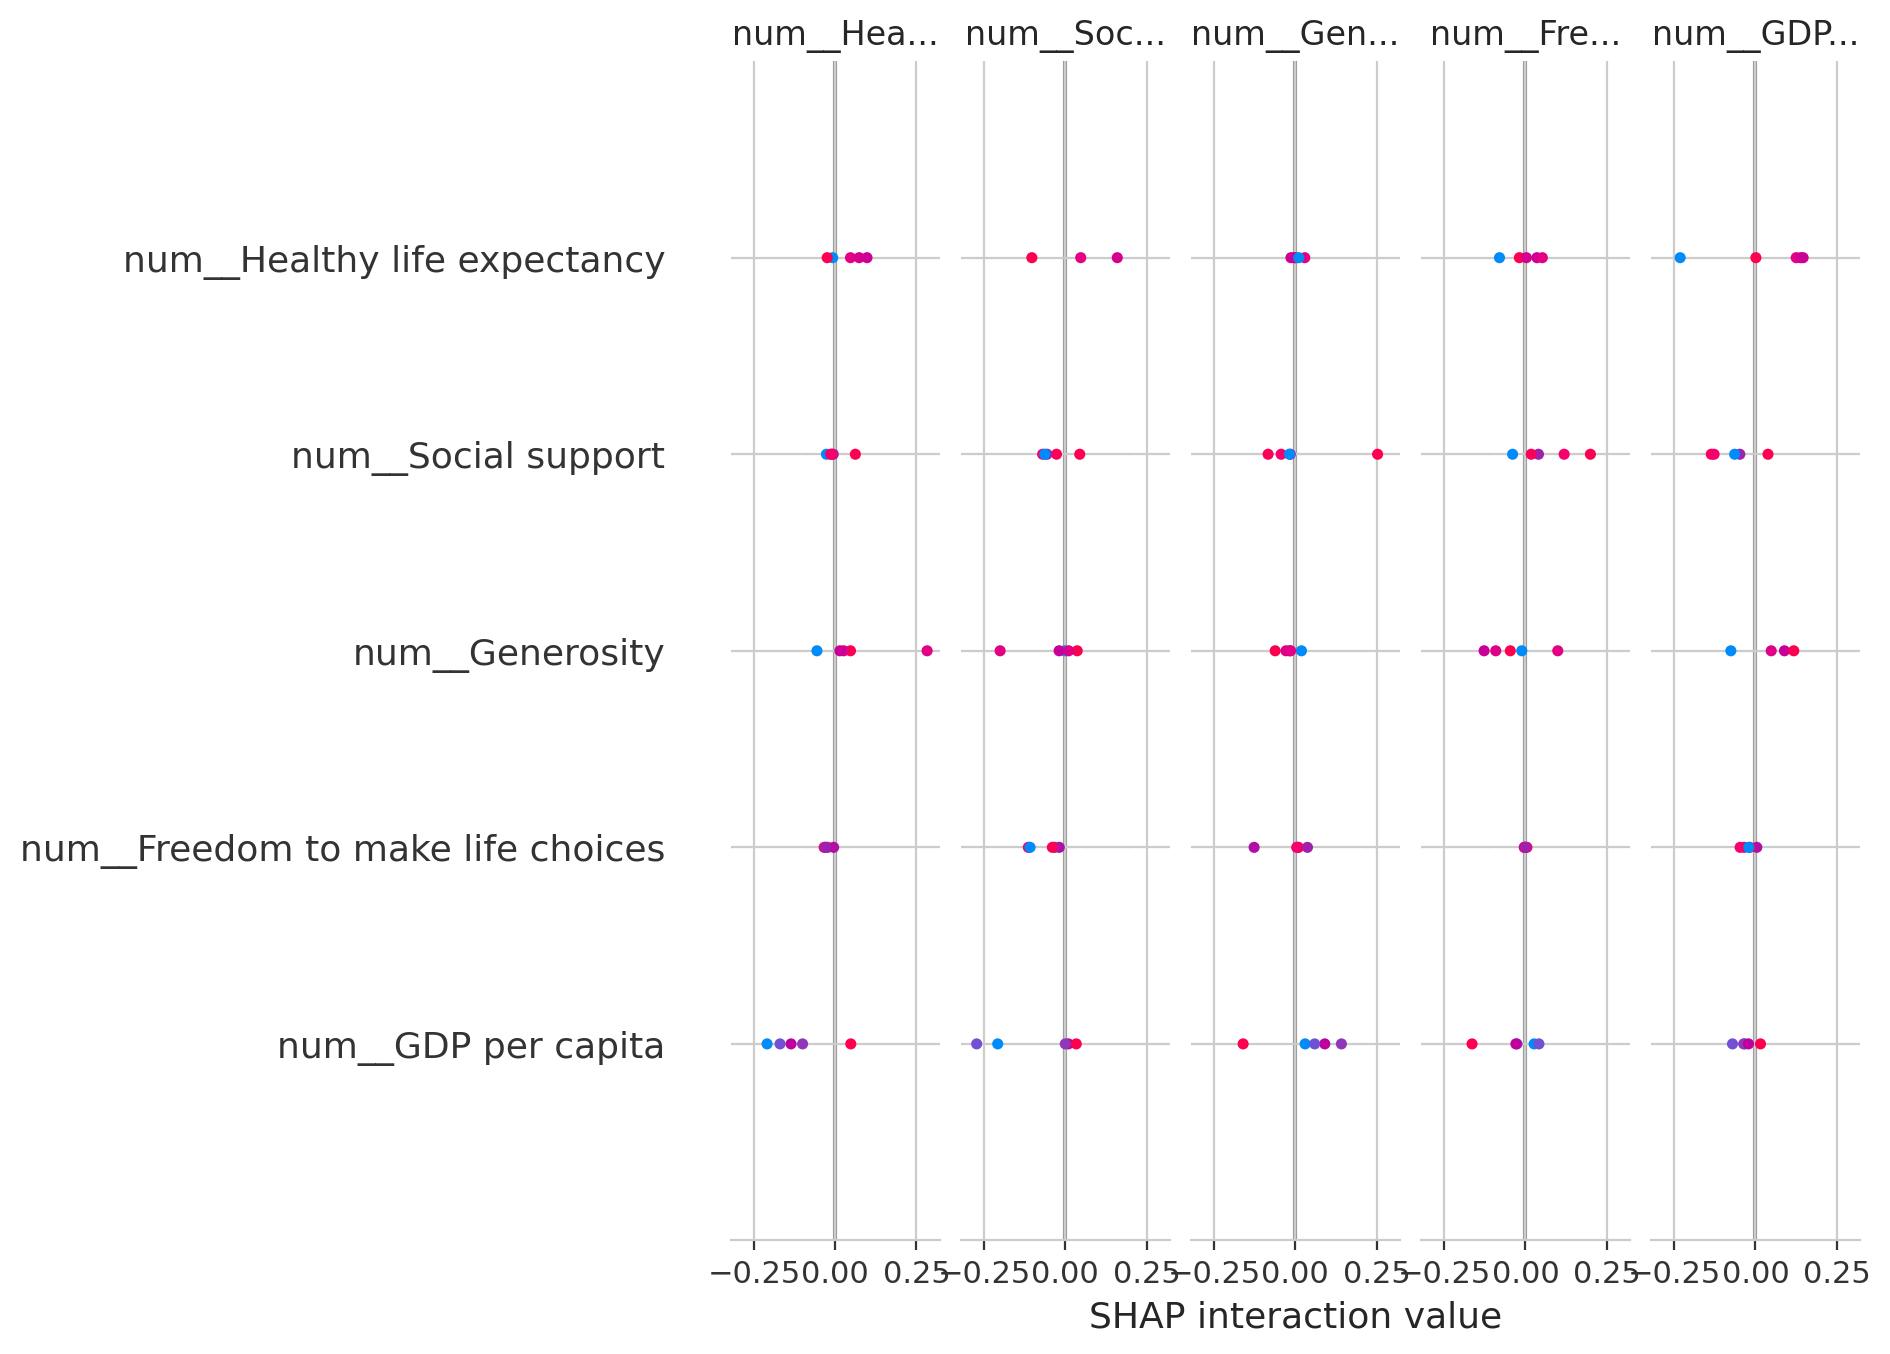

In [ ]:
import shap

# Select a sample of test data for explanation
X_explain = preprocessor(X_test)[:5]  # Explain first 10 instances

# Initialize SHAP explainer
explainer = shap.KernelExplainer(keras_model.predict, preprocessor(X_train)[:50])  # Use a subset for background

# Compute SHAP values
shap_values = explainer.shap_values(X_explain)

# Get feature names
feature_names = preprocess.get_feature_names_out()

# Plot summary of feature importances
shap.summary_plot(shap_values, X_explain, feature_names=feature_names, plot_type="bar")

After applying SHAP analysis, the main factors influencing the model's prediction of happiness are clear. Social support, healthy life expectancy, and GDP per capita are the most important features, with positive impacts on happiness. Other factors like generosity and freedom also contribute but to a lesser extent. SHAP provides a clear and sufficient explanation of how the model makes decisions, revealing key insights into the importance of social, health, and economic factors. While SHAP effectively clarifies feature impacts, justifying the model's predictions becomes easier but still requires careful interpretation, especially for complex interactions.

# 7. Submission of final report and clean code to github

[This is a final project you display on your GitHub to the World]

**Instructions**
- Make a new notebook, visualize any plots you found relevant
- Reproduce the code you used for the best models and display results
- Write what insights you found useful and what behaviours were observed
- Make it in a style of a clean, succint report (within the .ipynb)
- Upload this final report notebook to a new repository in your personal github account
- Remember to paste the link of your final repo at the top of this notebook where asked